# SHAP Interaction
Using the SHAP python package to identify interactions in data


In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import xgboost as xgb
from xgboost import plot_importance

import shap
shap.initjs()

from sklearn.metrics import accuracy_score,confusion_matrix

In [6]:
#import dataset
data = pd.read_csv("../data/interaction_dataset.csv",sep='\t')

y = data['bonus']
X = data.drop('bonus', axis=1)

print(len(data))
data.head()

1000


,experience,degree,performance,sales,days_late,bonus
0,31,1,6.11,29,14,197
1,35,1,9.55,44,8,314
2,9,1,2.64,26,20,88
3,40,1,0.22,13,7,233
4,18,1,6.46,11,13,108


In [9]:
#Train model
model = xgb.XGBRegressor(objective="reg:squarederror",max_depth=3) 
model.fit(X, y)

#Get predictions
y_pred = model.predict(X)

Text(0.5, 0, 'Actual')

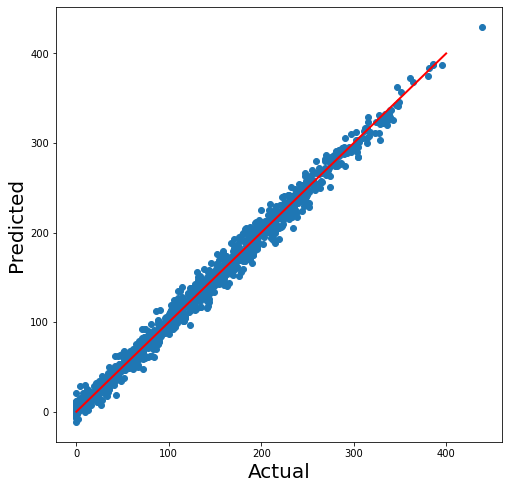

In [11]:
#Model evaluation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8,8))

plt.scatter(y,y_pred)
plt.plot([0, 400], [0, 400], color='r', linestyle='-', linewidth=2)

plt.ylabel('Predicted',size=20)
plt.xlabel('Actual',size=20)

#plt.savefig(path.format('regression_evaluation.png'),dpi=200,bbox_inches='tight')

In [28]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)
shap_interaction = explainer.shap_interaction_values(X)

In [24]:
np.shape(shap_interaction)

(1000, 5, 5)

In [25]:
y_pred[0]

208.90596

In [38]:
pd.DataFrame(shap_interaction[0]).sum().sum()

59.975433

In [15]:
mean_interaction = np.abs(shap_interaction).sum(0)
pd.DataFrame(mean_interaction)

,0,1,2,3,4
0,36922.218750,9591.882812,1583.871338,1358.437988,450.094055
1,9591.879883,44713.996094,1150.322266,1030.383545,205.648254
2,1583.870483,1150.321655,30562.406250,6476.871094,595.098633
3,1358.437134,1030.383911,6476.870117,30189.695312,670.233643
4,450.093689,205.648315,595.098755,670.233582,4645.098145


In [39]:
print(y_pred[0])
y_pred.mean() + pd.DataFrame(shap_interaction[0]).sum().sum()

208.90596


208.90593

In [14]:
mean_interaction = np.abs(shap_interaction).mean(0)
pd.DataFrame(mean_interaction)

,0,1,2,3,4
0,36.922218,9.591883,1.583871,1.358438,0.450094
1,9.591880,44.713997,1.150322,1.030384,0.205648
2,1.583871,1.150322,30.562407,6.476871,0.595099
3,1.358437,1.030384,6.476870,30.189695,0.670234
4,0.450094,0.205648,0.595099,0.670234,4.645098


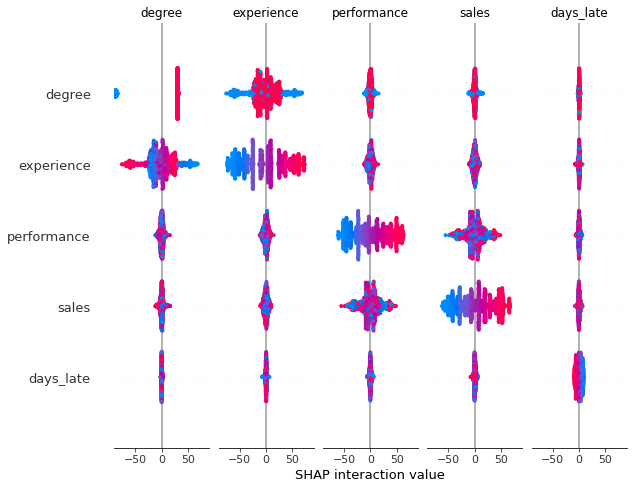

In [19]:
shap.summary_plot(shap_interaction, X)

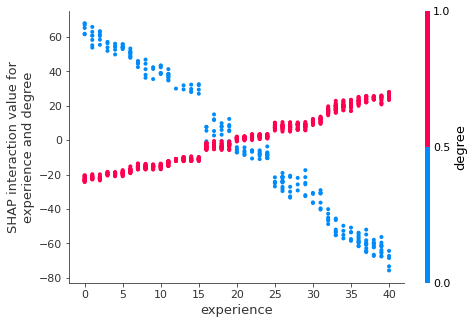

In [34]:
shap.dependence_plot(
    ("experience", "degree"),
    shap_interaction, X,
    display_features=X
)

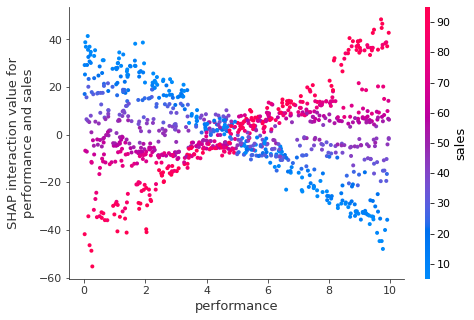

In [32]:
shap.dependence_plot(
    ("performance", "sales"),
    shap_interaction, X,
    display_features=X
)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


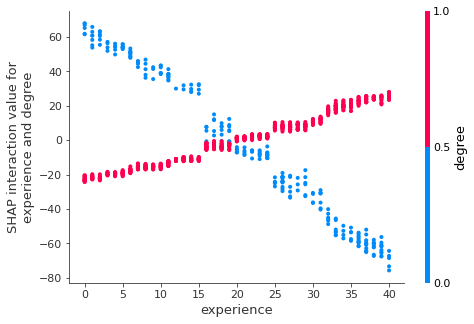